Review Questions and Answers

- What is Sequential?
      Sequential is Model API. The Sequential model is linear stack of layers.A sequential model can be created by passing list of layers to the constructor.
      
- What is Sigmoid?
        Sigmoid is an logistic function. This activation function squashes the real numbers between 0 and 1
    
- What is Relu?
        Relu stands for Rectified Linear Unit. This activation function thresholds its arguments at 0 and provides only positive values

- Which cross entropy is used for Multiclass?
        categorical cross-entropy is used for multi-class classification, where the target variable is one-hot encoded
        sparse categorical cross-entropy is used for multi-class classification, where the target variable is not one-hot encoded
- What is the resulting matrix size before adding bias?
        With a batch size of 100 and a sample size of 3072 with 10 classes, 100x3072 . 3072x10 = 100x10
    
- What is the Bias size?
        10
- How different sized weight matrix and bias are added?
        This is by broadcasting.  
        A related broadcasting problem is broadcasting two arrays that have the same rank but different dimension sizes. Similarly to Numpy's rules, this is only possible when the arrays are compatible. Two arrays are compatible when all their dimensions are compatible. Two dimensions are compatible if:

        They are equal, or
        One of them is 1 (a "degenerate" dimension)
        
       When two compatible arrays are encountered, the result shape has the maximum among the two inputs at every dimension index.

        Examples:

            1. (2,1) and (2,3) broadcast to (2,3).
            2. (1,2,5) and (7,2,5) broadcast to (7,2,5)
            3. (7,2,5) and (7,1,5) broadcast to (7,2,5)
            4. (7,2,5) and (7,2,6) are incompatible and cannot be broadcast.



Implementation of Loss function

In [1]:
def L_i(x, y, W):
  """
  unvectorized version. Compute the multiclass svm loss for a single example (x,y)
  - x is a column vector representing an image (e.g. 3073 x 1 in CIFAR-10)
    with an appended bias dimension in the 3073-rd position (i.e. bias trick)
  - y is an integer giving index of correct class (e.g. between 0 and 9 in CIFAR-10)
  - W is the weight matrix (e.g. 10 x 3073 in CIFAR-10)
  """
  delta = 1.0 # see notes about delta later in this section
  

  scores = W.dot(x) # scores becomes of size 10 x 1, the scores for each class
  
  correct_class_score = scores[y]
  
  #print(correct_class_score)
  D = W.shape[0] # number of classes, e.g. 10
  loss_i = 0.0
  for j in range(D): # iterate over all wrong classes
    if j == y:
      #print(j,y)
      # skip for the true class to only loop over incorrect classes
      continue
        
    # accumulate loss for the i-th example

    loss_i += max(0, scores[j] - correct_class_score + delta)
    
  return loss_i

def L_i_vectorized(x, y, W):
  """
  A faster half-vectorized implementation. half-vectorized
  refers to the fact that for a single example the implementation contains
  no for loops, but there is still one loop over the examples (outside this function)
  """
  delta = 1.0
  scores = W.dot(x)
  # compute the margins for all classes in one vector operation
  margins = np.maximum(0, scores - scores[y] + delta)

  # on y-th position scores[y] - scores[y] canceled and gave delta. We want
  # to ignore the y-th position and only consider margin on max wrong class

  loss_i = np.sum(margins)
  return loss_i-1

def L(x, y, W):
  """
  fully-vectorized implementation :
  - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
  - y is array of integers specifying correct class (e.g. 50,000-D array)
  - W are weights (e.g. 10 x 3073)
  """
  delta = 1.0
  scores = W.dot(x)
  escores=np.choose(y,scores)
  # compute the margins for all classes in one vector operation
  margins = np.maximum(0, scores - escores + delta)
  
  # on y-th position scores[y] - scores[y] canceled and gave delta. We want
  # to ignore the y-th position and only consider margin on max wrong class
  loss_i = np.sum(margins)
  return loss_i-x.shape[1]
  # evaluate loss over all examples in X without using any for loops
  # left as exercise to reader in the assignment

In [2]:
import tensorflow as tf
import numpy as np
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [1]:
import sys
sys.path.insert(0, r'C:\Users\Administrator\Downloads\image-classification-CIFAR10-tf-master\image-classification-CIFAR10-tf-master')
import data_helpers

data_sets = data_helpers.load_data()


In [4]:
xx=data_sets['images_train']
yy=data_sets['labels_train']
xx=np.c_[xx,np.ones(xx.shape[0])]
xx.shape

(50000, 3073)

In [5]:
sess = tf.Session()
saver = tf.train.import_meta_graph("/tmp/model.ckpt.meta")
saver.restore(sess, '/tmp/model.ckpt')
a=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
w=a[0].eval(session=sess)
b=a[1].eval(session=sess)
w=np.c_[w.T,b]
loss=0
#for i in range(2):
for i in range(len(yy)):
    x=xx[i]
    y=yy[i]
    y=int(y)
    x=np.asarray(x)
    x1=L_i(x,y,w)

    loss+=x1
print(loss)
w.shape


INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
185854747.66392815


(10, 3073)

In [6]:
loss=0
#for i in range(2):
for i in range(len(yy)):
    x=xx[i]
    y=yy[i]
    y=int(y)
    x=np.asarray(x)
    x1=L_i_vectorized(x.T,y,w)
    #print(x)
    loss+=x1
print(loss)

185854747.66392815


In [7]:
L(xx[:].T,yy[:],w)

185854747.66392717

Softmax Classifier

In [1]:
import numpy as np
#f = np.array([123, 456, 789]) # example with 3 classes and each having large scores
f = np.array([3, 1, 0.2])
#f = np.array([100, 200, 300])
p = np.exp(f) / np.sum(np.exp(f)) # Bad: Numeric problem, potential blowup
print(p)
# instead: first shift the values of f so that the highest number is 0:
f -= np.max(f) # f becomes [-666, -333, 0]
#f=-f
p = np.exp(f) / np.sum(np.exp(f)) # safe to do, gives the correct answer
p

[ 0.8360188   0.11314284  0.05083836]


array([ 0.8360188 ,  0.11314284,  0.05083836])

Neural network implementation of spiral toy

In [9]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

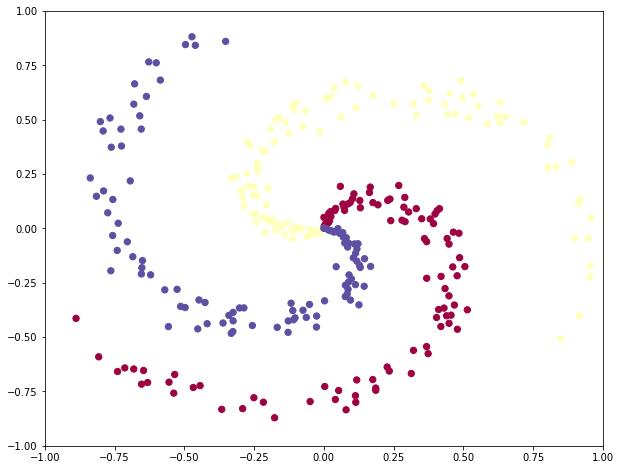

In [10]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [11]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.096919
iteration 10: loss 0.917310
iteration 20: loss 0.851535
iteration 30: loss 0.822352
iteration 40: loss 0.807594
iteration 50: loss 0.799452
iteration 60: loss 0.794683
iteration 70: loss 0.791765
iteration 80: loss 0.789921
iteration 90: loss 0.788726
iteration 100: loss 0.787937
iteration 110: loss 0.787408
iteration 120: loss 0.787049
iteration 130: loss 0.786803
iteration 140: loss 0.786633
iteration 150: loss 0.786514
iteration 160: loss 0.786431
iteration 170: loss 0.786373
iteration 180: loss 0.786331
iteration 190: loss 0.786302


In [12]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


(-1.8712034092398278, 1.8687965907601756)

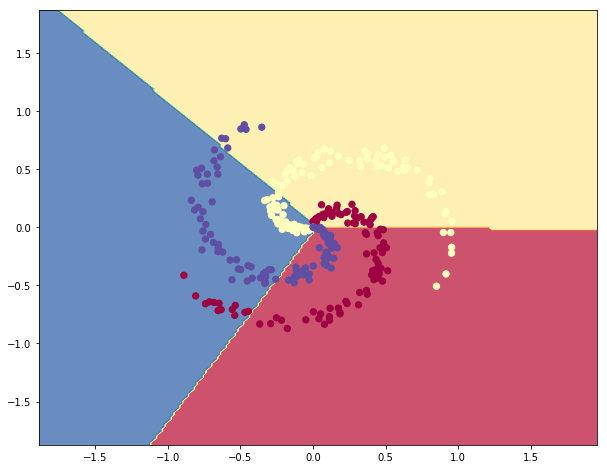

In [13]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

In [14]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098637
iteration 1000: loss 0.294416
iteration 2000: loss 0.266441
iteration 3000: loss 0.251507
iteration 4000: loss 0.248295
iteration 5000: loss 0.247107
iteration 6000: loss 0.246421
iteration 7000: loss 0.245961
iteration 8000: loss 0.245331
iteration 9000: loss 0.245060


In [15]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


(-1.8712034092398278, 1.8687965907601756)

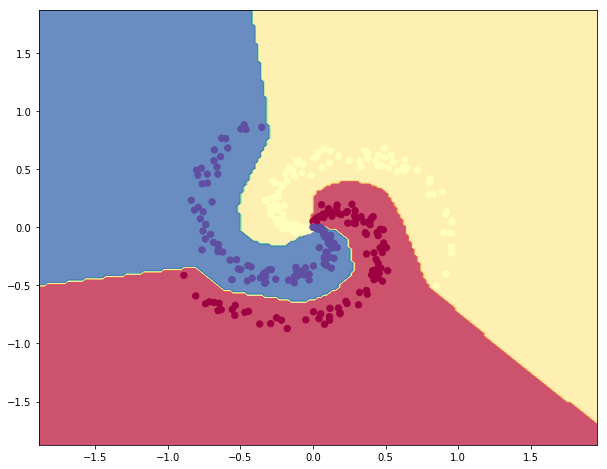

In [16]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')